<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/master/MCA_SDU_S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Distribuidos y Ubicuos II
## MCA Tercer cuatrimestre
### Horacio Tapia-McClung


# Resumen Semana 4



In [0]:
import numpy as np
a = np.random.rand(10000)

import dask.array as da

a_dask = da.from_array(a, chunks=len(a)//4)

print(a_dask.chunks)

result = a_dask.sum()

print(result.compute())

((2500, 2500, 2500, 2500),)
5018.048565989095


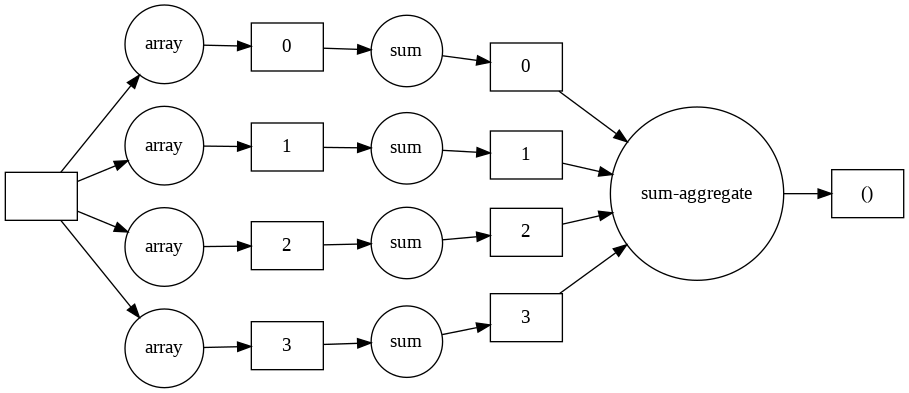

In [0]:
result.visualize(rankdir='LR')

In [0]:
time_series = np.array([49,51,60,54,47,50,64,58,47,43,50,63,67,68,64,48,55,46,66,51,52])
np.savetxt('max_temps.csv', time_series.astype(int), fmt='%i')
time_series = np.loadtxt('max_temps.csv', dtype=np.int64) 

#reshape arrays using numpy
tabla = time_series.reshape((3,7)) # reorganiza la lista por renglones cada renglon es una semana

time_series.reshape((7,3)) 

time_series.reshape((7,3), order='F')

prom_diario = tabla.mean(axis=0)

prom_semanal = tabla.mean(axis=1)

# broadcast arrays
tabla - prom_diario

tabla - prom_semanal

print(tabla.shape)
print(prom_diario.shape)
print(prom_semanal.shape)


res = tabla - prom_semanal.reshape((3,1))

ValueError: ignored

# Semana 5 

Operaciones con arreglos usando dask

In [0]:
data = np.genfromtxt('https://www1.ncdc.noaa.gov/pub/data/ccd-data/hghtmp15.dat', usecols=(2,3,4,5), skip_header=5, dtype=np.int64)

In [0]:
data.shape

(259, 4)

In [0]:
data_dask = da.from_array(data, chunks=(259,2))

In [0]:
res = data_dask.std(axis=0) # desviacion estandard por columnas

In [0]:
res.compute()

array([33.76117147, 18.49776124, 15.00331354, 10.15791446])

Descargamos el siguiente dataset

In [0]:
!wget https://github.com/htapiagroup/sistdist/raw/mca2019/2014-01-30.hdf5

--2019-06-04 14:25:53--  https://github.com/htapiagroup/sistdist/raw/mca2019/2014-01-30.hdf5
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/htapiagroup/sistdist/mca2019/2014-01-30.hdf5 [following]
--2019-06-04 14:25:55--  https://raw.githubusercontent.com/htapiagroup/sistdist/mca2019/2014-01-30.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84673 (83K) [application/octet-stream]
Saving to: ‘2014-01-30.hdf5.1’

2014-01-30.hdf5.1   100%[===================>]  82.69K  --.-KB/s    in 0.02s   

2019-06-04 14:25:55 (3.28 MB/s) - ‘2014-01-30.hdf5.1’ saved [84673/84673]



In [0]:
import h5py, time

In [0]:
f = h5py.File('2014-01-30.hdf5.1', 'r')

In [0]:
for key in f.keys():
  print(key)

t2m


In [0]:
data = f['t2m']
type(data)

h5py._hl.dataset.Dataset

In [0]:
data.ndim

2

In [0]:
data.shape

(180, 360)

In [0]:
data_dask = da.from_array(data, chunks=(15,360))

In [0]:
data_dask.min()

dask.array<amin-aggregate, shape=(), dtype=float64, chunksize=()>

In [0]:
data_dask.min().compute()

12.25

### TIP:  si su base de datos tiene huecos o faltandes, pueden usar el siguiente comnado apra ignorarlos

In [0]:
da.nanmin(data_dask).compute()

12.25

In [0]:
min = data_dask.min().compute()
max = data_dask.max().compute()

In [0]:
print(min, max)

12.25 237.5


In [0]:
data_dask[:,:]

dask.array<array, shape=(180, 360), dtype=float64, chunksize=(15, 360)>

In [0]:
import matplotlib.pyplot as plt

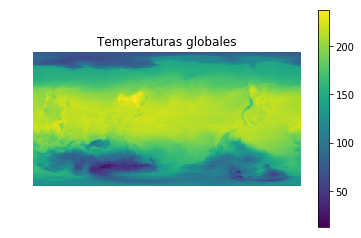

In [0]:
plt.imshow(data_dask[:,:], origin ='lower', vmin=min, vmax=max);
plt.title('Temperaturas globales')
plt.axis('off')
plt.colorbar()

## Apilando (stacking) arreglos

In [0]:
a = np.ones(3)
b = 2*a
c = 3*a

In [0]:
print(a, '\n')
print(b, '\n')
print(c, '\n')

[1. 1. 1.] 

[2. 2. 2.] 

[3. 3. 3.] 



In [0]:
np.stack([a, b])

array([[1., 1., 1.],
       [2., 2., 2.]])

In [0]:
np.stack([a, b], axis=0) # igual que arriba es por default

array([[1., 1., 1.],
       [2., 2., 2.]])

In [0]:
np.stack([a, b], axis=1) # hace un arreglo bidimensional de forma (3,2)

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [0]:
X = np.stack([a, b])
Y = np.stack([b, c])
Z = np.stack([c, a])
print(X, '\n')
print(Y, '\n')
print(Z, '\n')

[[1. 1. 1.]
 [2. 2. 2.]] 

[[2. 2. 2.]
 [3. 3. 3.]] 

[[3. 3. 3.]
 [1. 1. 1.]] 



In [0]:
np.stack([X, Y, Z])

array([[[1., 1., 1.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [3., 3., 3.]],

       [[3., 3., 3.],
        [1., 1., 1.]]])

In [0]:
np.stack([X, Y, Z], axis = 1) 

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [3., 3., 3.],
        [1., 1., 1.]]])

## Dataframes con dask

In [0]:
import dask
df = dask.datasets.timeseries()
df

In [0]:
import os
import datetime

if not os.path.exists('data'):
  os.mkdir('data')
  
def name(i):
  """ fecha para archivo dado el indice """
  return str(datetime.date(2000,1,1) + i * datetime.timedelta(days=1))

df.to_csv('data/*.csv', name_function=name);

In [0]:
import dask.dataframe as dd

In [0]:
transacciones = dd.read_csv('data/*.csv')
# head
# tail


In [0]:
es_wendy = (transacciones['name'] == "Wendy")

In [0]:
montos_wendy = transacciones.loc[es_wendy, 'x']

In [0]:
wendy_diff = montos_wendy.sum()

In [0]:
wendy_diff.visualize()

Timing a dask dataframe

In [0]:
# timing dask dataframe operations
# ask yourselves, 
# 1. does your data fits in RAM?
# 2. does your data fits on hard disk

# download taxi data

import os
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
urls = (plantillaURL.format(k) for k in range(1,13)) # generator
for url in urls:
  os.system(url)

In [0]:
%ll -h yellow_tripdata_2018-*.csv

In [0]:
import time, pandas as pd

In [0]:
t_start = time.time()
df = pd.read_csv('yellow_tripdata_2018-01.csv')
t_end = time.time()
print('pd.read_csv(): {} s'.format(t_end-t_start))

In [0]:
t_start = time.time()
m = df['trip_distance'].mean()
t_end = time.time()
print('.mean(): {} ms'.format((t_end-t_start)*1000))

In [0]:
t_start = time.time()
df = dd.read_csv('yellow_tripdata_2018-*.csv')
t_end = time.time()
print('dd.read_csv(): {} ms'.format((t_end-t_start)*1000))

In [0]:
t_start = time.time()
m = df['trip_distance'].mean()
t_end = time.time()
print('.mean(): {} ms'.format((t_end-t_start)*1000))

In [0]:
t_start = time.time()
result = m.compute()
t_end = time.time()
print('.compute(): {} min'.format((t_end-t_start)/60))

In [0]:
%time result = m.compute()

You can see that if the data set can be read into memory with pandas it is likely going to be faster than Dask, which needs to read the file chunkwise throughout the pipeline and does not cache intermediates in memory.

In [0]:
https://catalog.data.gov/dataset/aster-global-emissivity-dataset-monthly-0-05-deg-hdf5-v041/resource/bff5e164-21bf-4213-a18c-3bc785768186